In [55]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
nadeje = pd.read_csv('nadeje.csv', sep=',', encoding='utf-8')
narozeni = pd.read_csv('narozeni.csv', sep=',', encoding='utf-8')
plodnost = pd.read_csv('plodnost.csv', sep=',', encoding='utf-8')

##zapnout rovnomernou distribuci dat / vytizenost a aby šlo se dostat z jakehokoli uzlu kamkoliv
##narozeni - https://data.gov.cz/datov%C3%A1-sada?iri=https%3A%2F%2Fdata.gov.cz%2Fzdroj%2Fdatov%C3%A9-sady%2F00025593%2F5948c8558e7dcc7b75e89fe13c26dcb0
##nadeje - https://data.gov.cz/datov%C3%A1-sada?iri=https%3A%2F%2Fdata.gov.cz%2Fzdroj%2Fdatov%C3%A9-sady%2F00025593%2Fbfe32ca003b860395f09b506d07ff665
##plodnost - https://data.gov.cz/datov%C3%A1-sada?iri=https%3A%2F%2Fdata.gov.cz%2Fzdroj%2Fdatov%C3%A9-sady%2F00025593%2Fb5094f4457e365b7540df88999d2ccb8

In [57]:
#Dropovaní nullových hodnot
nadeje = nadeje.dropna()
narozeni = narozeni.dropna()
plodnost = plodnost.dropna()

In [58]:
#rename sloupce "ČR, Reg. soudržnosti, Kraje"
narozeni.rename(columns={'ČR, Reg. soudržnosti, Kraje': 'Oblast'}, inplace=True)
plodnost.rename(columns={'ČR, Reg. soudržnosti, Kraje': 'Oblast'}, inplace=True)

In [59]:
#přetypování všech IndicatorType a Ukazatel na string
narozeni['IndicatorType'] = narozeni['IndicatorType'].astype(str)
plodnost['IndicatorType'] = plodnost['IndicatorType'].astype(str)
nadeje['IndicatorType'] = nadeje['IndicatorType'].astype(str)

narozeni['Ukazatel'] = narozeni['Ukazatel'].astype(str)
plodnost['Ukazatel'] = plodnost['Ukazatel'].astype(str)
nadeje['Ukazatel'] = nadeje['Ukazatel'].astype(str)

In [60]:
#Pridani sloupce Uz01A do narozeni a plodnosti pro budoci shardovani
narozeni['Uz01A'] = narozeni['Uz012'].str[0:4]
plodnost['Uz01A'] = plodnost['Uz012'].str[0:4]

plodnost.to_csv('plodnost_upravena.csv', index=False)
narozeni.to_csv('narozeni_upravena.csv', index=False)

In [61]:
#kontrola Uz01A
nadejeUz01A = nadeje['Uz01A'].unique()
narozeniUz01A = narozeni['Uz01A'].unique()
plodnostUz01A = plodnost['Uz01A'].unique()
print(nadejeUz01A)
print(narozeniUz01A)  
print(plodnostUz01A)

print(set(nadejeUz01A) - set(narozeniUz01A))
print(set(nadejeUz01A) - set(plodnostUz01A))
       

['CZ' 'CZ01' 'CZ02' 'CZ03' 'CZ04' 'CZ05' 'CZ06' 'CZ07' 'CZ08']
['CZ' 'CZ01' 'CZ02' 'CZ03' 'CZ04' 'CZ05' 'CZ06' 'CZ07' 'CZ08']
['CZ' 'CZ01' 'CZ02' 'CZ03' 'CZ04' 'CZ05' 'CZ06' 'CZ07' 'CZ08']
set()
set()


In [62]:
nadejeUz01A = nadeje['Uz01A'].value_counts()
#print("Nadeje dozití: \n", nadejeUz01A)

narozeniUz01A = narozeni['Uz01A'].value_counts()
#print("Narození: \n", narozeniUz01A)

plodnostUz01A = plodnost['Uz01A'].value_counts()
#print("Plodnost: \n", plodnostUz01A)

celkem = pd.DataFrame()
celkem['Nadeje dožití'] = nadejeUz01A
celkem['Narození'] = narozeniUz01A
celkem['Plodnost'] = plodnostUz01A
celkem['Celkem'] = celkem.sum(axis=1)
print(celkem)

       Nadeje dožití  Narození  Plodnost  Celkem
Uz01A                                           
CZ              4876       336       805    6017
CZ01            4876       672      1610    7158
CZ02            4876       672      1610    7158
CZ03            4876      1008      2415    8299
CZ04            4876      1008      2415    8299
CZ05            4876      1344      3220    9440
CZ06            4876      1008      2415    8299
CZ07            4876      1008      2415    8299
CZ08            4876       672      1610    7158


In [63]:
#kontrola jestli jsou sloupce Roky a CasR totožné

for i in range(len(nadeje)):
    if nadeje['Roky'][i] != nadeje['CasR'][i]:
        print("Nesouhlasí")
        print(nadeje['Roky'][i])
        print(nadeje['CasR'][i])
        break
    
for i in range(len(narozeni)):
    if narozeni['Roky'][i] != narozeni['CasR'][i]:
        print("Nesouhlasí")
        print(narozeni['Roky'][i])
        print(narozeni['CasR'][i])
        break

for i in range(len(plodnost)):
    if plodnost['Roky'][i] != plodnost['CasR'][i]:
        print("Nesouhlasí")
        print(plodnost['Roky'][i])
        print(plodnost['CasR'][i])
        break

In [64]:
#odstranení duplicitniho cloupce CasR
nadeje = nadeje.drop(columns=['CasR'])
plodnost = plodnost.drop(columns=['CasR'])
narozeni = narozeni.drop(columns=['CasR'])

#uložení upravených dat do nových csv souborů
nadeje.to_csv('nadeje_upravena.csv', index=False)
narozeni.to_csv('narozeni_upravena.csv', index=False)
plodnost.to_csv('plodnost_upravena.csv', index=False)

In [65]:
# Informace o  nadeje
print(nadeje.info())
print(nadeje.head())
nadeje.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43884 entries, 0 to 43883
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ukazatel       43884 non-null  object 
 1   IndicatorType  43884 non-null  object 
 2   ČR, regiony    43884 non-null  object 
 3   Uz01A          43884 non-null  object 
 4   Roky           43884 non-null  int64  
 5   Pohlaví        43884 non-null  object 
 6   POHZM          43884 non-null  int64  
 7   Věk (roky)     43884 non-null  int64  
 8   VEK1UT         43884 non-null  int64  
 9   Hodnota        43884 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 3.3+ MB
None
             Ukazatel IndicatorType ČR, regiony Uz01A  Roky Pohlaví  POHZM  \
0  Naděje dožití (ex)        5411UT       Česko    CZ  2001    ženy      2   
1  Naděje dožití (ex)        5411UT       Česko    CZ  2001    ženy      2   
2  Naděje dožití (ex)        5411UT       Česko    CZ  2001   

,Ukazatel,IndicatorType,"ČR, regiony",Uz01A,Roky,Pohlaví,POHZM,Věk (roky),VEK1UT,Hodnota
count,43884,43884,43884,43884,43884.000000,43884,43884.000000,43884.000000,4.388400e+04,43884.000000
unique,1,1,9,9,NaN,2,NaN,NaN,NaN,NaN
top,Naděje dožití (ex),5411UT,Česko,CZ,NaN,ženy,NaN,NaN,NaN,NaN
freq,43884,43884,4876,4876,NaN,21942,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2012.000000,NaN,1.500000,52.500000,4.096758e+14,31.258511
std,NaN,NaN,NaN,NaN,6.633325,NaN,0.500006,30.598551,3.885930e+12,24.311403
min,NaN,NaN,NaN,NaN,2001.000000,NaN,1.000000,0.000000,4.000006e+14,1.282733
25%,NaN,NaN,NaN,NaN,2006.000000,NaN,1.000000,26.000000,4.100266e+14,7.823007
50%,NaN,NaN,NaN,NaN,2012.000000,NaN,1.500000,52.500000,4.100531e+14,27.087884
75%,NaN,NaN,NaN,NaN,2018.000000,NaN,2.000000,79.000000,4.100796e+14,52.159219


In [66]:
# Informace o  narozeni
print(narozeni.info())
print(narozeni.head())
narozeni.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728 entries, 0 to 7727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ukazatel       7728 non-null   object 
 1   IndicatorType  7728 non-null   object 
 2   Roky           7728 non-null   int64  
 3   Oblast         7728 non-null   object 
 4   Uz012          7728 non-null   object 
 5   Hodnota        7728 non-null   float64
 6   Uz01A          7728 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 422.8+ KB
None
   Ukazatel IndicatorType  Roky         Oblast Uz012  Hodnota Uz01A
0  Narození          4355  2000          Česko    CZ  91169.0    CZ
1  Narození          4355  2000          Praha  CZ01   9472.0  CZ01
2  Narození          4355  2000  Střední Čechy  CZ02   9962.0  CZ02
3  Narození          4355  2000      Jihozápad  CZ03  10576.0  CZ03
4  Narození          4355  2000    Severozápad  CZ04  10953.0  CZ04


,Ukazatel,IndicatorType,Roky,Oblast,Uz012,Hodnota,Uz01A
count,7728,7728,7728.000000,7728,7728,7728.000000,7728
unique,14,14,NaN,23,23,NaN,9
top,Narození,4355,NaN,Česko,CZ,NaN,CZ05
freq,552,552,NaN,336,336,NaN,1344
mean,NaN,NaN,2011.500000,NaN,NaN,4381.727223,NaN
std,NaN,NaN,6.922634,NaN,NaN,10616.565241,NaN
min,NaN,NaN,2000.000000,NaN,NaN,1.072804,NaN
25%,NaN,NaN,2005.750000,NaN,NaN,30.810030,NaN
50%,NaN,NaN,2011.500000,NaN,NaN,1491.000000,NaN
75%,NaN,NaN,2017.250000,NaN,NaN,5510.000000,NaN


In [67]:
# Informace o plodnosti
print(plodnost.info())
print(plodnost.head())
plodnost.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18515 entries, 0 to 18514
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ukazatel                 18515 non-null  object 
 1   IndicatorType            18515 non-null  object 
 2   Roky                     18515 non-null  int64  
 3   Oblast                   18515 non-null  object 
 4   Uz012                    18515 non-null  object 
 5   Věk (jednoleté skupiny)  18515 non-null  int64  
 6   VEKZEN1PLOD              18515 non-null  int64  
 7   Hodnota                  18515 non-null  float64
 8   Uz01A                    18515 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.3+ MB
None
         Ukazatel IndicatorType  Roky Oblast Uz012  Věk (jednoleté skupiny)  \
0  Míry plodnosti          5406  2001  Česko    CZ                       15   
1  Míry plodnosti          5406  2001  Česko    CZ                       

,Ukazatel,IndicatorType,Roky,Oblast,Uz012,Věk (jednoleté skupiny),VEKZEN1PLOD,Hodnota,Uz01A
count,18515,18515,18515.000000,18515,18515,18515.000000,1.851500e+04,18515.000000,18515
unique,1,1,NaN,23,23,NaN,NaN,NaN,9
top,Míry plodnosti,5406,NaN,Česko,CZ,NaN,NaN,NaN,CZ05
freq,18515,18515,NaN,805,805,NaN,NaN,NaN,3220
mean,NaN,NaN,2012.000000,NaN,NaN,32.000000,4.100326e+14,42.206040,NaN
std,NaN,NaN,6.633429,NaN,NaN,10.099778,1.009979e+10,41.198390,NaN
min,NaN,NaN,2001.000000,NaN,NaN,15.000000,4.100156e+14,0.000000,NaN
25%,NaN,NaN,2006.000000,NaN,NaN,23.000000,4.100236e+14,3.881731,NaN
50%,NaN,NaN,2012.000000,NaN,NaN,32.000000,4.100326e+14,29.616725,NaN
75%,NaN,NaN,2018.000000,NaN,NaN,41.000000,4.100416e+14,74.680895,NaN


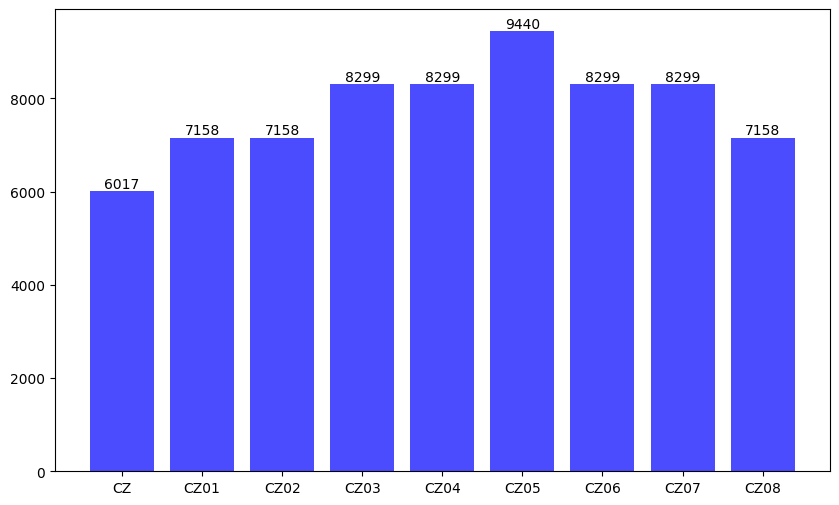

In [68]:
#Graf celkoveho poctu dat podle regionu
plt.figure(figsize=(10, 6))
bars = plt.bar(celkem.index, celkem['Celkem'], color='blue', alpha=0.7, label='Celkem')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.show()

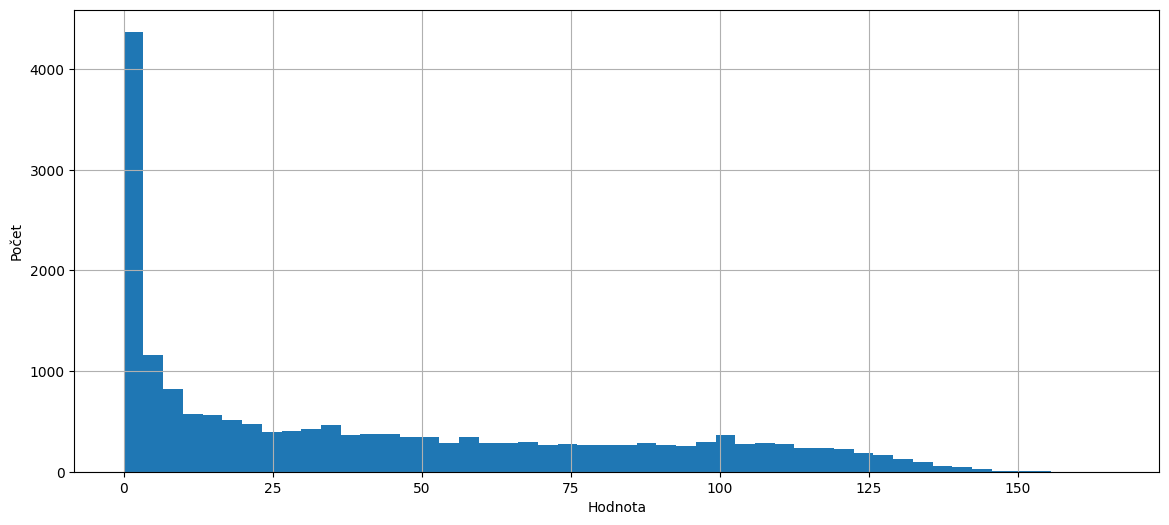

In [ ]:
#Histogram pro plodnost
plt.figure(figsize=(14, 6))
plodnost['Hodnota'].hist(bins=50)
plt.xlabel('Hodnota')
plt.ylabel('Počet')
plt.show()

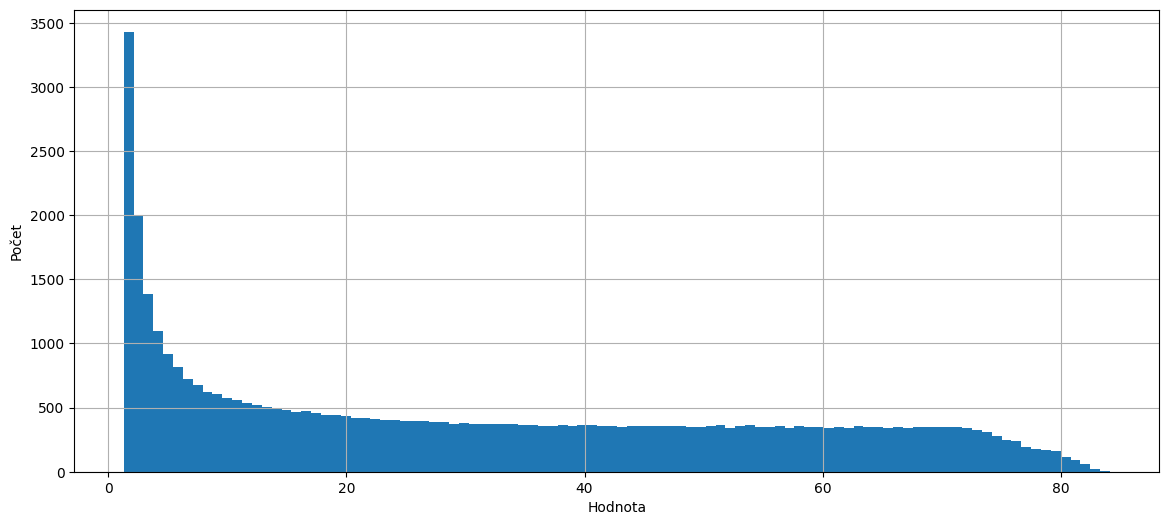

In [86]:
#Histogram pro nadeji dožití
plt.figure(figsize=(14, 6))
nadeje['Hodnota'].hist(bins=100)
plt.xlabel('Hodnota')
plt.ylabel('Počet')
plt.show()